In [1]:
import numpy as np
import sympy as smp
from sympy import Matrix, solve_linear_system
from sympy.solvers.solvers import solve_linear_system_LU
from sympy import *

smp.init_printing()
pi = smp.pi

Define the symbols

In [2]:
# Constants
alpha, beta, k1, k2, k3, d = smp.symbols(r'\alpha, \beta, k_1, k_2, k_3, d')

#Variables
AA, BB, CC, DD = smp.symbols(r'A, B, C, D')

Define the equations

In [3]:
E1 = AA - BB - CC + 1
E2 = AA + beta*BB -beta*CC - 1
E3 = BB*smp.exp(I*k2*d) + CC*smp.exp(-I*k2*d) - DD*smp.exp(I*k3*d)
E4 = BB*smp.exp(I*k2*d) - CC*smp.exp(-I*k2*d) - alpha*DD*smp.exp(I*k3*d)

sols = solve([E1, E2, E3, E4], [AA, BB, CC, DD])

Compute the solutions

In [4]:
T = (alpha*beta*sols[DD]*sols[DD]).simplify()
R = (sols[AA]*sols[AA]).simplify()

Now we have

$$\alpha=\frac{v_2}{v_3}=\frac{n_3}{n_2} \hspace{8mm} \beta = \frac{v_1}{v_2}=\frac{n_2}{n_1} \hspace{8mm} k_i=\frac{\omega}{v_i}=\frac{\omega n_i}{c}$$


In [5]:
# Constants
n1, n2, n3, omega, cc = smp.symbols(r'n_1, n_2, n_3, \omega, c')

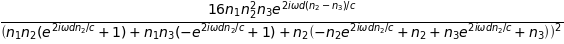

In [6]:
T_fin = T.subs({alpha:n3/n2, beta:n2/n1, k2:omega*n2/cc, k3:omega*n3/cc}).simplify()
T_fin

In [7]:
num1, dem = fraction(T_fin)

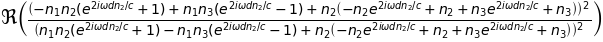

In [12]:
R_fin = R.subs({alpha:n3/n2, beta:n2/n1, k2:omega*n2/cc, k3:omega*n3/cc}).simplify()
re(R_fin).simplify()

In [9]:
num2, _ = fraction(R_fin)

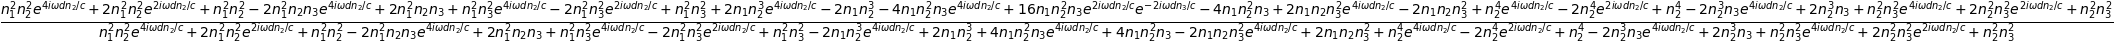

In [10]:
((num1+num2).expand())/(dem.expand())